In [1]:
import os
os.chdir('../..')
import numpy as np
from rdkit.Chem import MolFromSmarts

FATTY_ACID_PATT = MolFromSmarts("C-C-C-C(-[OH])=O")


def is_fatty_acid(mol):
    if mol.HasSubstructMatch(FATTY_ACID_PATT):
        atom_types = [a.GetSymbol() for a in mol.GetAtoms()]
        uq, counts = np.unique(atom_types, return_counts=True)
        if ["C", "O"] == uq.tolist() and counts[1] == 2:
            return True
        return False

RDKit WARNING: [15:57:12] Enabling RDKit 2019.09.3 jupyter extensions


In [2]:
from rdkit.Chem import MolFromSmiles
from rdkit.Chem.inchi import MolFromInchi

import pickle
from molgrad.utils import DATA_PATH
    

In [3]:
with open(os.path.join(DATA_PATH, "ppb", "data_ppb.pt"), "rb") as handle:
    inchis, values = pickle.load(handle)

from tqdm import tqdm

fatty_acids = []
idxs = []
for idx, inchi in enumerate(tqdm(inchis)):
    if is_fatty_acid(MolFromInchi(inchi)):
        fatty_acids.append(inchi)
        idxs.append(idx)

vals = [values[idx] for idx in idxs]

 35%|███▍      | 1612/4626 [00:00<00:01, 2327.23it/s]RDKit WARNING: [15:57:14] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:57:14] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:57:14] WARNING: not removing hydrogen atom without neighbors
 40%|████      | 1868/4626 [00:00<00:01, 2391.24it/s]RDKit WARNING: [15:57:14] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:57:14] WARNING: not removing hydrogen atom without neighbors
 45%|████▌     | 2100/4626 [00:00<00:01, 2174.48it/s]RDKit WARNING: [15:57:14] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:57:14] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:57:14] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:57:14] WARNING: not removing hydrogen atom without neighbors
 50%|█████     | 2316/4626 [00:01<00:01, 2082.97it/s]RDKit WARNING: [15:57:14] WARNING: not removing hydrogen atom withou

In [4]:
from molgrad.vis import molecule_importance
from molgrad.utils import MODELS_PATH
from molgrad.train import DEVICE

Using backend: pytorch


In [5]:
import torch
model_pt = os.path.join(MODELS_PATH, 'ppb_noHs.pt')

from molgrad.net import MPNNPredictor

model = MPNNPredictor(node_in_feats=49,
                      edge_in_feats=10,
                      global_feats=4,
                      n_tasks=1).to(DEVICE) 
model.load_state_dict(torch.load(model_pt,
                                 map_location=DEVICE))

<All keys matched successfully>

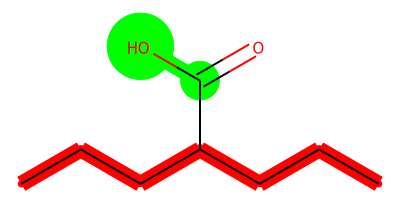

In [6]:
mol = MolFromInchi(fatty_acids[0])
svg, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=0.5,
                                                      eps=0.1,
                                                      addHs=False)
img

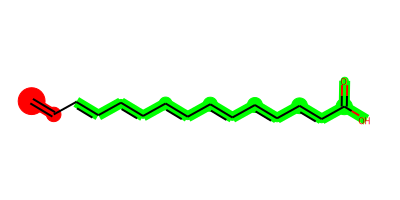

In [7]:
mol = MolFromInchi('InChI=1S/C15H16O2/c1-2-3-4-5-6-7-8-9-10-11-12-13-14-15(16)17/h2-14H,1H2,(H,16,17)/b4-3+,6-5+,8-7+,10-9+,12-11+,14-13+')
svg, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=2,
                                                      eps=1e-4,
                                                      addHs=False)
img

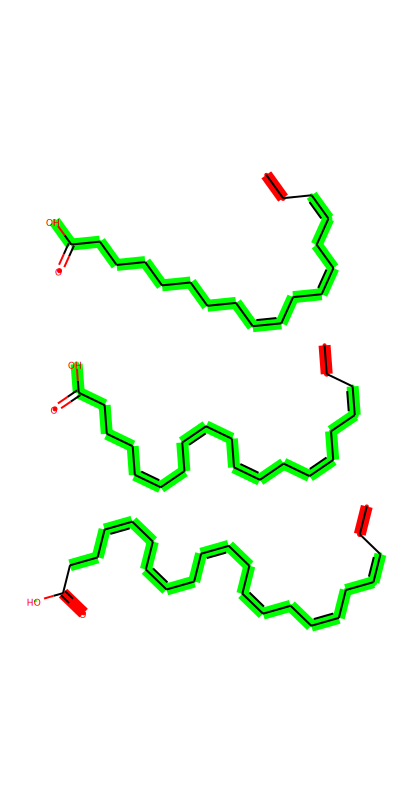

In [8]:
mol = MolFromInchi('InChI=1S/C22H32O2.C20H30O2.C18H30O2/c1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22(23)24;1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20(21)22;1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18(19)20/h3-4,6-7,9-10,12-13,15-16,18-19H,2,5,8,11,14,17,20-21H2,1H3,(H,23,24);3-4,6-7,9-10,12-13,15-16H,2,5,8,11,14,17-19H2,1H3,(H,21,22);3-4,6-7,9-10H,2,5,8,11-17H2,1H3,(H,19,20)/b4-3-,7-6-,10-9-,13-12-,16-15-,19-18-;4-3-,7-6-,10-9-,13-12-,16-15-;4-3-,7-6-,10-9-')
svg_fatty, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=2,
                                                      eps=1e-4,
                                                      addHs=False,
                                                      img_height=800)

from molgrad.utils import EXAMPLE_PATH
with open(os.path.join(EXAMPLE_PATH, "ppb_motif_fatty.svg"), "w+") as handle:
    handle.write(svg_fatty)
img